In [11]:
pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 960.0 kB/s eta 0:00:10
      --------------------------------------- 0.2/9.2 MB 2.4 MB/s eta 0:00:04
     - -------------------------------------- 0.3/9.2 MB 2.2 MB/s eta 0:00:05
     - -------------------------------------- 0.4/9.2 MB 2.5 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/9.2 MB 2.7 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/9.2 MB 2.8 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/9.2 MB 2.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/9.2 MB 2.7 MB/s eta 0:00:04
     ---- ----------------------------------- 1.1/9.2 MB 2.8 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/9.2 MB 2.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.4/9.2 MB 2.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.4/9.2 MB 2.7 MB/s eta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('poro_perm.csv')
df.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [3]:
df.describe()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
count,728.000000,728.000000,728.00000,728.000000,557.000000,557.000000,141.000000,141.000000,593.000000,71.000000,71.000000,71.000000,594.000000,71.000000
mean,3920.528338,3920.153338,3.93956,364.500000,649.801463,627.972549,490.086071,472.875284,16.829342,19.497183,56.943662,28.309859,2.653569,2.656901
std,46.545695,46.902816,1.75976,210.299786,2160.127387,2116.307023,1973.601098,1929.420018,6.552523,5.657763,21.084319,19.203758,0.046735,0.035560
min,3838.600000,3837.000000,1.00000,1.000000,0.018000,0.010000,0.030000,0.017000,2.900000,2.700000,0.000000,4.500000,2.250000,2.620000
25%,3882.580000,3881.980000,3.00000,182.750000,2.620000,2.030000,0.874000,0.590000,12.000000,18.150000,52.000000,18.200000,2.640000,2.630000
50%,3921.725000,3921.125000,4.00000,364.500000,59.900000,52.300000,27.300000,23.300000,18.100000,21.200000,62.300000,22.800000,2.650000,2.650000
75%,3960.287500,3960.487500,5.00000,546.250000,213.000000,194.000000,108.000000,96.300000,21.700000,23.500000,68.500000,29.950000,2.660000,2.660000
max,3999.950000,3999.750000,7.00000,728.000000,20800.000000,20500.000000,14800.000000,14500.000000,36.000000,27.800000,86.000000,90.800000,3.030000,2.810000


In [4]:
df.columns

Index(['DEPTH', 'OrigDepth', 'CORE_NO', 'SAMPLE', 'CKHG', 'CKHL', 'CKVG',
       'CKVL', 'CPOR', 'CPORV', 'So', 'Sw', 'CGD', 'CGDV'],
      dtype='object')

In [5]:
df.isnull().all()

DEPTH        False
OrigDepth    False
CORE_NO      False
SAMPLE       False
CKHG         False
CKHL         False
CKVG         False
CKVL         False
CPOR         False
CPORV        False
So           False
Sw           False
CGD          False
CGDV         False
dtype: bool

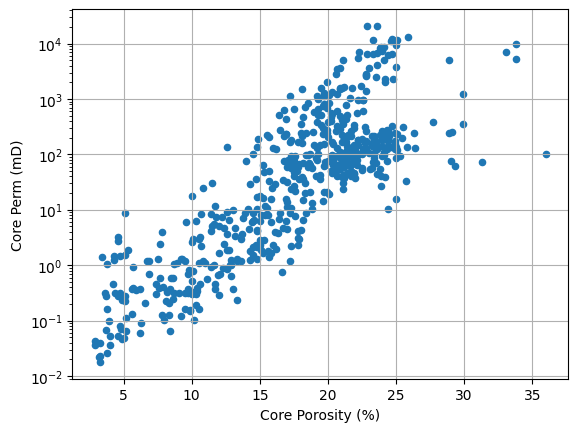

In [6]:
df.plot(kind='scatter',x="CPOR", y="CKHG")
plt.ylabel('Core Perm (mD)')
plt.xlabel('Core Porosity (%)')
plt.yscale('log')
plt.grid()

In [7]:
# copy of the dataframe

df_new = df[['CPOR','CKHG']].copy()
df_new.head()

,CPOR,CKHG
0,17.0,13.80
1,14.8,NaN
2,10.8,25.20
3,12.8,1.02
4,NaN,NaN


In [8]:
df_new.shape

(728, 2)

In [9]:
df_new.dropna(inplace=True)
df_new.shape

(557, 2)

In [12]:
import statsmodels.api as sm

In [13]:
X = df_new.CPOR
X.head()

0    17.0
2    10.8
3    12.8
5    16.4
6    16.5
Name: CPOR, dtype: float64

In [14]:
X = sm.add_constant(X)
X

,const,CPOR
0,1.0,17.0
2,1.0,10.8
3,1.0,12.8
5,1.0,16.4
6,1.0,16.5
...,...,...
723,1.0,28.9
724,1.0,20.7
725,1.0,20.9
726,1.0,17.3


In [16]:
y = np.log10(df_new.CKHG)
y.head()

0    1.139879
2    1.401401
3    0.008600
5    2.719331
6    2.437751
Name: CKHG, dtype: float64

In [17]:
# building the model

model = sm.OLS(y,X,missing='drop')
results = model.fit()

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CKHG   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1340.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          4.26e-150
Time:                        11:59:02   Log-Likelihood:                -601.06
No. Observations:                 557   AIC:                             1206.
Df Residuals:                     555   BIC:                             1215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5561      0.088    -17.768      0.000      -1.728      -1.384
CPOR           0.1743      0.005     36.602      0.000       0.165       0.184
==============================================================================
Omnibus:                        6.685   Durbin-Watson:                   0.853
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.790
Skew:                           0.254   Prob(JB):                       0.0335
Kurtosis:                       2.816   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
results.params

const   -1.556078
CPOR     0.174287
dtype: float64

In [20]:
m = results.params[1]
c = results.params[0]

y_pred = c + m*X
y_pred.head()

,const,CPOR
0,-1.381791,1.406802
2,-1.381791,0.326222
3,-1.381791,0.674796
5,-1.381791,1.302229
6,-1.381791,1.319658


In [23]:
print(X.shape)
print(y.shape)

print(y_pred.shape)

(557, 2)
(557,)
(557, 2)


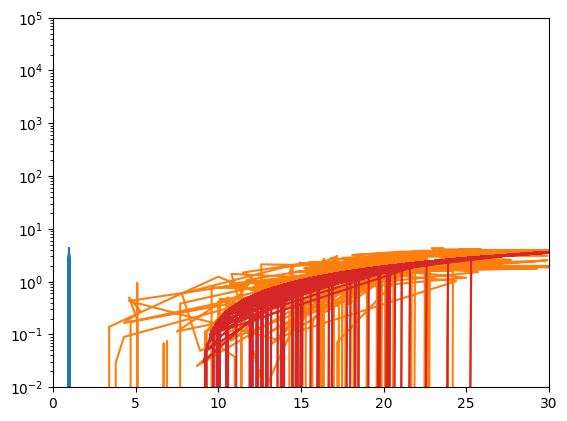

In [26]:
fig,ax = plt.subplots()

ax.axis([0, 30, 0.01, 100000])
ax.semilogy(X,y)
ax.semilogy(X,y_pred)

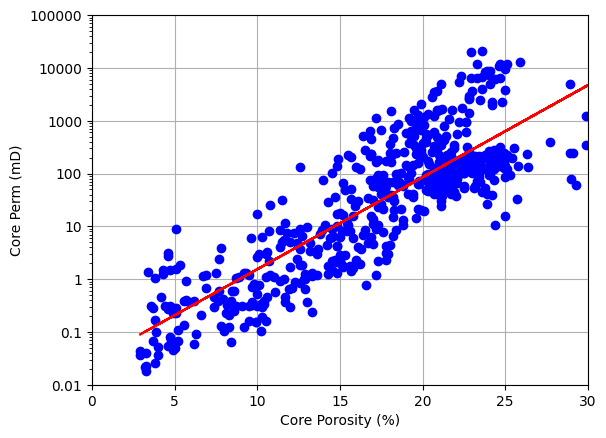

In [24]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 30, 0.01, 100000])
ax.semilogy(df_new['CPOR'], df_new['CKHG'], 'bo')

ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

ax.semilogy(df_new['CPOR'], 10**(results.params[1] * df_new['CPOR'] + results.params[0]), 'r-')

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
plt.savefig('predicted_poro_perm_xplot.png', dpi=100)